# Expressões idiomáticas (Idioms)

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.DataFrame({
    'AAA': [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, -30, -50]
})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


# if-then...

In [5]:
# Trocando os valores de 'BBB' seguindo o critério dos valores de 'AAA'
df.loc[df['AAA'] >= 5, 'BBB'] = -1; df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [7]:
# Mesmo critérios de 'AAA' para trocar em duas colunas 'BBB' e 'CCC'
df.loc[df['AAA'] >= 5, ['BBB','CCC']] = 555; df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


In [10]:
# Outra condição. Se for menor que 5 troca para o valor 2000 nas duas colunas
df.loc[df['AAA'] < 5, ['BBB','CCC']] = 2000;df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


Utilizando mascara

In [16]:
df_mask = pd.DataFrame({
    'AAA': [True] * 4,
    'BBB': [False] * 4,
    'CCC': [True, False] * 2
})
df_mask

,AAA,BBB,CCC
0,True,False,True
1,True,False,False
2,True,False,True
3,True,False,False


In [17]:
df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


In [18]:
# Todas as ocorrencias relacionadas False do df_mask foram trocadas no DataFrame df
df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


# if-then-else

In [19]:
df = pd.DataFrame({
    'AAA': [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, -30, -50]
})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [22]:
# O método where é ternário: where(condicao, cond1, ou cond2)
df['AAA'] > 5 

0    False
1    False
2     True
3     True
Name: AAA, dtype: bool

In [24]:
# Criando uma nova coluna onde caso o vaalor de 'AAA' for maior que 5 seta na coluna logic high, caso contrário low
df['logic'] = np.where(df['AAA'] > 5, 'high','low'); df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


# Splitting

In [25]:
df = pd.DataFrame({
    'AAA': [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, -30, -50]
})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [26]:
dflow = df[df['AAA'] <= 5]; dflow

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [27]:
dfhigh = df[df['AAA'] > 5]; dfhigh

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


# Building Criteria

Seleção com múltiplas condições

In [28]:
df = pd.DataFrame({
    'AAA': [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, -30, -50]
})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [30]:
# Através do separador lógico "&" (AND) você pode combinar mais de uma condição de critério
newseries = df.loc[
    (df['BBB'] < 25) & (df['CCC'] >= -40), 'AAA'
]
newseries

0    4
1    5
Name: AAA, dtype: int64

In [32]:
newseries = df.loc[
    (df['BBB'] > 25) | (df['CCC'] >= -40), 'AAA'
]
newseries

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

In [33]:
# dá para modificar os valores com multiplas condições de critérios
df.loc[(df['BBB'] > 25) | (df['CCC'] >= 75), 'AAA'] = 0.1; df

,AAA,BBB,CCC
0,0.1,10,100
1,5.0,20,50
2,0.1,30,-30
3,0.1,40,-50


# Selecionado dados para valores próximos do esperado

utilizando o método arqsort()

In [34]:
df = pd.DataFrame({
    'AAA' : [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, -30, -50]
})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [35]:
aValue = 43.0

In [43]:
df.loc[(df['CCC'] - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


# Dinamicamente reduzindo a lista utilizando critérios com operadores binários

In [44]:
df = pd.DataFrame({
    'AAA': [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, -30, -50]
})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [47]:
Crit1 = df['AAA'] <= 5.5
Crit2 = df['BBB'] == 10.0
Crit3 = df['CCC'] > -40.0

In [48]:
# Pode ser feito desta forma ou da forma a seguir
AllCrit = Crit1 & Crit2 & Crit3

In [55]:
df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


In [56]:
# Esta forma a seguir pode ser utilizada também. Tem o mesmo resultado
CritList = [Crit1, Crit2, Crit3]

In [57]:
from functools import reduce

In [58]:
AllCrit = reduce(lambda x, y: x & y, CritList)

In [59]:
df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


# Selecão (Selection)

# DataFrames

In [60]:
df = pd.DataFrame({
    'AAA': [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, -30, -50]
})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [63]:
df[df.index.isin([0, 2, 3])] # seleciona por indice

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30
3,7,40,-50


In [65]:
df[(df['AAA'] <= 6) & (df.index.isin([0, 2, 3]))] # combina mais de um critério

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


Utilizando os métodos <strong>loc</strong> e <strong>iloc</strong> com labels nos indices

In [67]:
data = {
    'AAA': [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, -30, -50]
}

df = pd.DataFrame(data=data, index=['foo', 'bar', 'boo','kar']); df

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [69]:
# o índice criado cria uma referência que você pode buscar por um intervalo dentro dos labels. Exemplo:
df.loc['bar':'kar'] # busca entre bar e kar

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [71]:
df.loc['foo':'kar'] # busca entre foo e kar

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


Busca genérica por indice com <strong>iloc</strong>

In [73]:
df.iloc[0:3] # retorna as 3 primeiras linhas

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [76]:
df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4]); # Note o indice vai iniciar no 1
df2

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30
4,7,40,-50


In [75]:
df2.iloc[1:3] # Este métodos considera o indice 0 mesmo ele não estando explicito, o metodo loc é diferente

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [78]:
df2.loc[1:3] # Note que ele considera o intervalo do "label do indice criado"

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


In [80]:
df = pd.DataFrame(data = data); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


Usando o sinal "~" o resultado obtido é o inverso da seleção

In [85]:
df[~((df['AAA'] <= 6) & (df.index.isin([0,2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


# Panels

Os panels são containers 3d de dados

In [100]:
rng = pd.date_range('1/1/2018', periods=100, freq='D')

In [101]:
data = np.random.randn(100, 4)

In [89]:
cols = ['A', 'B', 'C', 'D']

In [102]:
df1, df2, df3 = pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng, cols), pd.DataFrame(data, rng, cols)
df1.head()

,A,B,C,D
2018-01-01,0.049016,0.456957,2.431818,-0.723480
2018-01-02,1.534547,-0.178425,0.742374,0.292459
2018-01-03,-0.557859,-1.341082,-1.281164,-0.789643
2018-01-04,-1.516282,-0.995018,0.390903,-0.162003
2018-01-05,-0.194768,-0.846825,-1.473033,-0.544601


In [94]:
pf = pd.Panel({
    'df1': df1,
    'df2': df2,
    'df3': df3
})
pf

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 100 (major_axis) x 4 (minor_axis)
Items axis: df1 to df3
Major_axis axis: 2018-01-01 00:00:00 to 2018-04-10 00:00:00
Minor_axis axis: A to D

In [96]:
pf.loc[:,:,'F'] = pd.DataFrame(data, rng, cols); pf

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 100 (major_axis) x 5 (minor_axis)
Items axis: df1 to df3
Major_axis axis: 2018-01-01 00:00:00 to 2018-04-10 00:00:00
Minor_axis axis: A to F

# New Columns

Criando colunas com o applymap

In [107]:
data = {
    'AAA': [1, 2, 1, 3],
    'BBB': [1, 1, 2, 2],
    'CCC': [2, 1, 3, 1]
}

df = pd.DataFrame(data = data); df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [109]:
source_cols = df.columns
source_cols

Index(['AAA', 'BBB', 'CCC'], dtype='object')

In [110]:
new_cols = [str(x) + "_cat" for x in source_cols]
new_cols

['AAA_cat', 'BBB_cat', 'CCC_cat']

In [111]:
categories = {
    1: 'Alpha',
    2: 'Beta',
    3: 'Charlie'
}

In [124]:
df[new_cols] = df[source_cols].applymap(categories.get)
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


Matendo outra coluna usando <strong>min()</strong> com <strong>groupby</strong>

In [125]:
df = pd.DataFrame({
    'AAA': [1, 1, 1, 2, 2, 2, 3, 3],
    'BBB': [2, 1, 3, 4, 5, 1, 2, 3]
})
df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


In [126]:
# Primeira possibilidade utilizando o idxmin()
df.loc[df.groupby('AAA')['BBB'].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


In [129]:
# Segunda forma, ordena primeiro BBB e depois agrupa AAAA
df.sort_values(by='BBB').groupby('AAA', as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


# MultiIndexing

Os recursos de multindexing são muito importantes. Convém o aprofundamento neste estudo.

In [155]:
df = pd.DataFrame({
    'row': [0, 1, 2],
    'One_X': [1.1, 1.1, 1.1],
    'One_Y': [1.2, 1.2, 1.2],
    'Two_X': [1.11, 1.11, 1.11],
    'Two_Y': [1.22, 1.22, 1.22]
})
df

,One_X,One_Y,Two_X,Two_Y,row
0,1.1,1.2,1.11,1.22,0
1,1.1,1.2,1.11,1.22,1
2,1.1,1.2,1.11,1.22,2


In [156]:
# Criando o label para o indice
df.set_index('row')

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [157]:
df.columns = pd.MultiIndex.from_tuples([tuple(c.split('_')) for c in df.columns])
df

One        Two       row
     X    Y     X     Y NaN
0  1.1  1.2  1.11  1.22   0
1  1.1  1.2  1.11  1.22   1
2  1.1  1.2  1.11  1.22   2

In [158]:
# Stack e Reset
df = df.stack(0).reset_index(1); df

,level_1,X,Y
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [160]:
df.columns = ['Sample','ALL_X','ALL_Y']; df

,Sample,ALL_X,ALL_Y
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


# Aritimética

In [162]:
[(x, y) for x in ['A', 'B', 'C'] for y in ['O', 'I']]

[('A', 'O'), ('A', 'I'), ('B', 'O'), ('B', 'I'), ('C', 'O'), ('C', 'I')]

In [163]:
cols = pd.MultiIndex.from_tuples([(x, y) for x in ['A', 'B', 'C'] for y in ['O', 'I']])

In [166]:
df = pd.DataFrame(np.random.randn(2, 6), index = ['n', 'm'], columns=cols);
df

A                   B                   C          
          O         I         O         I         O         I
n -0.480416 -0.707281  2.189265 -1.532339 -0.406808 -0.080807
m -1.413816  0.442898  1.474157 -0.776488  1.745115  1.203682

# Slicing

In [168]:
coords = [('AA', 'one'), ('AA', 'six'), ('BB', 'one'), ('BB', 'two'), ('BB', 'six')]

In [169]:
index = pd.MultiIndex.from_tuples(coords)

In [172]:
df = pd.DataFrame([11, 22, 33, 44, 55], index, ['MyData']) ;df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

In [181]:
# Este método retorna os dados a partir de uma seleção cruzada. Muito útil
df.xs('BB', level=0)

,MyData
one,33
two,44
six,55


In [182]:
df.xs('one', level=1)

,MyData
AA,11
BB,33


In [189]:
from itertools import product

In [190]:
# Fatiando multi-index com xs, segunda forma
index = list(product(['Ada', 'Quinn', 'Violet'], ['Comp', 'Math', 'Sci']))

In [193]:
headr = list(product(['Exams', 'Labs'], ['I', 'II']))

In [194]:
indx = pd.MultiIndex.from_tuples(index, names=['Student', 'Course'])

In [196]:
cols = pd.MultiIndex.from_tuples(headr)

In [202]:
data = [[70+x+y+(x*y)%3 for x in range(4)] for y in range(9)]; data

[[70, 71, 72, 73],
 [71, 73, 75, 74],
 [72, 75, 75, 75],
 [73, 74, 75, 76],
 [74, 76, 78, 77],
 [75, 78, 78, 78],
 [76, 77, 78, 79],
 [77, 79, 81, 80],
 [78, 81, 81, 81]]

In [203]:
df = pd.DataFrame(data, indx, cols)
df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [204]:
All = slice(None)

In [206]:
df.loc['Violet']

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [207]:
df.loc[(All, 'Math'), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [209]:
df.loc[(slice('Ada','Quinn'), 'Math'), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [212]:
df.loc[(All, 'Math'), ('Exams')]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [213]:
df.loc[(All, 'Math'), (All, 'II')]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


# Sorting

In [214]:
df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [215]:
df.sort_values(by=('Labs','II'), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

# Missing Data - Dados faltantes

In [217]:
df = pd.DataFrame(np.random.randn(6, 1), index=pd.date_range('2018-01-01', periods=6, freq='B'), columns=list('A'))

In [218]:
df

,A
2018-01-01,-0.912602
2018-01-02,-2.196189
2018-01-03,0.402380
2018-01-04,0.807077
2018-01-05,-0.024398
2018-01-08,1.378170


In [219]:
df.loc[df.index[3], 'A'] = np.nan; df

,A
2018-01-01,-0.912602
2018-01-02,-2.196189
2018-01-03,0.402380
2018-01-04,NaN
2018-01-05,-0.024398
2018-01-08,1.378170


In [221]:
df.reindex(df.index[::-1]).ffill()

,A
2018-01-08,1.378170
2018-01-05,-0.024398
2018-01-04,-0.024398
2018-01-03,0.402380
2018-01-02,-2.196189
2018-01-01,-0.912602


# Grouping

In [223]:
df = pd.DataFrame({
    'animal': 'cat dog cat fish dog cat cat'.split(),
    'size': list('SSMMMLL'),
    'weight': [8, 10, 11, 1, 20, 12, 12],
    'adult': [False] * 5 + [True] * 2
})
df

,adult,animal,size,weight
0,False,cat,S,8
1,False,dog,S,10
2,False,cat,M,11
3,False,fish,M,1
4,False,dog,M,20
5,True,cat,L,12
6,True,cat,L,12


In [227]:
df.groupby('animal').apply(lambda subf: subf['size'][subf['weight'].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

In [228]:
gb = df.groupby(['animal'])

In [230]:
gb.get_group('cat')

,adult,animal,size,weight
0,False,cat,S,8
2,False,cat,M,11
5,True,cat,L,12
6,True,cat,L,12


In [231]:
# Apply para diferentes itens no group
def GroupUp(x):
    avg_weight = sum(x[x['size'] == 'S'].weight * 1.5)
    avg_weight += sum(x[x['size'] == 'M'].weight * 1.25)
    avg_weight += sum(x[x['size'] == 'L'].weight)
    avg_weight /= len(x)
    return pd.Series(['L', avg_weight, True], index=['size', 'weight', 'adult'])

In [232]:
expected_df = gb.apply(GroupUp)
expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


In [238]:
# Expandindo Apply
s = pd.Series([i / 100.0 for i in range(1, 11)]) ;s

0    0.01
1    0.02
2    0.03
3    0.04
4    0.05
5    0.06
6    0.07
7    0.08
8    0.09
9    0.10
dtype: float64

In [236]:
from functools import reduce

In [239]:
def CumRet(x, y):
    return x * (1 + y)

In [242]:
def Red(x):
    return reduce(CumRet, x, 1.0)

In [243]:
s.expanding().apply(Red)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

In [244]:
# Substituindo alguns valores com média 
df = pd.DataFrame({
    'A': [1,1,2,2],
    'B': [1,-1,1,2]
})
df

,A,B
0,1,1
1,1,-1
2,2,1
3,2,2


In [245]:
gb = df.groupby('A')

In [246]:
def replace(g):
    mask = g < 0
    g.loc[mask] = g[~mask].mean()
    return g

In [247]:
gb.transform(replace)

,B
0,1.0
1,1.0
2,1.0
3,2.0


In [251]:
# Classificar grupos por dados agrupados
df = pd.DataFrame({
    'code': ['foo', 'bar', 'baz'] * 2,
    'data': [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
    'flag': [False, True] * 3
})
df

,code,data,flag
0,foo,0.16,False
1,bar,-0.21,True
2,baz,0.33,False
3,foo,0.45,True
4,bar,-0.59,False
5,baz,0.62,True


In [252]:
code_groups = df.groupby('code')

In [257]:
code_groups[['data']]

In [253]:
agg_n_sort_order = code_groups[['data']].transform(sum).sort_values(by='data')

In [258]:
agg_n_sort_order.index

Int64Index([1, 4, 0, 3, 2, 5], dtype='int64')

In [255]:
sorted_df = df.loc[agg_n_sort_order.index]; sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


In [259]:
# Criar multiplas colunas agregadas
rng = pd.date_range(start="2014-10-07", periods=10, freq='2min')
rng

DatetimeIndex(['2014-10-07 00:00:00', '2014-10-07 00:02:00',
               '2014-10-07 00:04:00', '2014-10-07 00:06:00',
               '2014-10-07 00:08:00', '2014-10-07 00:10:00',
               '2014-10-07 00:12:00', '2014-10-07 00:14:00',
               '2014-10-07 00:16:00', '2014-10-07 00:18:00'],
              dtype='datetime64[ns]', freq='2T')

In [260]:
ts = pd.Series(data = list(range(10)), index=rng)
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

In [261]:
def MyCust(x):
    if len(x) > 2:
        return x[1] * 1.234
    return pd.NaT

In [262]:
mhc = {
    'Mean': np.mean,
    'Max': np.max,
    'Custom': MyCust
}

In [264]:
ts.resample('5min').apply(mhc)

Custom  2014-10-07 00:00:00    1.234
        2014-10-07 00:05:00      NaT
        2014-10-07 00:10:00    7.404
        2014-10-07 00:15:00      NaT
Max     2014-10-07 00:00:00        2
        2014-10-07 00:05:00        4
        2014-10-07 00:10:00        7
        2014-10-07 00:15:00        9
Mean    2014-10-07 00:00:00        1
        2014-10-07 00:05:00      3.5
        2014-10-07 00:10:00        6
        2014-10-07 00:15:00      8.5
dtype: object

In [265]:
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

In [275]:
df = pd.DataFrame({
    'Color': 'Red Red Red Blue'.split(),
    'Value': [100,150,50,50]
})
df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [277]:
df['Counts'] = df.groupby(['Color']).transform(len)
df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


In [279]:
df = pd.DataFrame({
        u'line_race': [10, 10, 8, 10, 10, 8],
        u'beyer': [99, 102, 103, 103, 88, 100]
    },
    index = [
        u'Last Gunfighter',
        u'Last Gunfighter',
        u'Last Gunfighter',
        u'Paynter',
        u'Paynter',
        u'Paynter'
    ]
)
df


,beyer,line_race
Last Gunfighter,99,10
Last Gunfighter,102,10
Last Gunfighter,103,8
Paynter,103,10
Paynter,88,10
Paynter,100,8


In [281]:
df['beyer_shifted'] = df.groupby(level=0)['beyer'].shift(1)
df

,beyer,line_race,beyer_shifted
Last Gunfighter,99,10,NaN
Last Gunfighter,102,10,99.0
Last Gunfighter,103,8,102.0
Paynter,103,10,NaN
Paynter,88,10,103.0
Paynter,100,8,88.0


In [283]:
df = pd.DataFrame({
    'host': ['other', 'other', 'that', 'this', 'this'],
    'service': ['mail', 'web', 'mail', 'mail', 'web'],
    'no': [1, 2, 1, 2, 1]
}).set_index(['host', 'service'])
df

no
host  service    
other mail      1
      web       2
that  mail      1
this  mail      2
      web       1

In [285]:
mask = df.groupby(level=0).agg('idxmax')
mask

,no
host,
other,"(other, web)"
that,"(that, mail)"
this,"(this, mail)"


In [286]:
df_count = df.loc[mask['no']].reset_index()
df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


In [287]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=['A'])

In [291]:
df['A'].groupby((df['A'] != df['A'].shift()).cumsum()).groups

{1: Int64Index([0], dtype='int64'),
 2: Int64Index([1], dtype='int64'),
 3: Int64Index([2], dtype='int64'),
 4: Int64Index([3, 4, 5], dtype='int64'),
 5: Int64Index([6], dtype='int64'),
 6: Int64Index([7, 8], dtype='int64')}

In [292]:
df.A.groupby((df.A!= df.A.shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

In [298]:
df.A

0    0
1    1
2    0
3    1
4    1
5    1
6    0
7    1
8    1
Name: A, dtype: int64

In [300]:
df.A.shift().cumsum()

0    NaN
1    0.0
2    1.0
3    1.0
4    2.0
5    3.0
6    4.0
7    4.0
8    5.0
Name: A, dtype: float64

# Expandindo Dados

# Splitting

In [303]:
df = pd.DataFrame(data={
    'Case': ['A', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'A'],
    'Data': np.random.randn(9)
})
df

,Case,Data
0,A,1.199693
1,A,-1.432634
2,A,-0.231219
3,B,-1.603176
4,A,-0.238885
5,A,0.259988
6,B,-1.551687
7,A,-0.675053
8,A,-0.671458


In [311]:
dfs = list(
    zip(
        *df.groupby(
            (1 * (df['Case'] == 'B')).cumsum().rolling(window=3, min_periods=1).median()
        )
    )
)[-1]

In [309]:
(1 * (df['Case'] == 'B')).cumsum().rolling(window=3, min_periods=1).median()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
5    1.0
6    1.0
7    2.0
8    2.0
Name: Case, dtype: float64

In [312]:
dfs

(  Case      Data
 0    A  1.199693
 1    A -1.432634
 2    A -0.231219
 3    B -1.603176,   Case      Data
 4    A -0.238885
 5    A  0.259988
 6    B -1.551687,   Case      Data
 7    A -0.675053
 8    A -0.671458)

# Pivot

In [313]:
df = pd.DataFrame(data={
    'Province': ['ON', 'QC', 'BC', 'AL', 'AL', 'MN', 'ON'],
    'City': ['Toronto', 'Montreal', 'Vancouver', 'Calgary', 'Edmonton', 'Winnipeg', 'Windsor'],
    'Sales': [13, 6, 16, 8, 4, 3, 1]
})
df

,City,Province,Sales
0,Toronto,ON,13
1,Montreal,QC,6
2,Vancouver,BC,16
3,Calgary,AL,8
4,Edmonton,AL,4
5,Winnipeg,MN,3
6,Windsor,ON,1


In [315]:
table = pd.pivot_table(df, values=['Sales'], index=['Province'], columns=['City'], aggfunc=np.sum, margins=True)
table

Sales                                                         
City     Calgary Edmonton Montreal Toronto Vancouver Windsor Winnipeg All
Province                                                                 
AL           8.0      4.0      NaN     NaN       NaN     NaN      NaN  12
BC           NaN      NaN      NaN     NaN      16.0     NaN      NaN  16
MN           NaN      NaN      NaN     NaN       NaN     NaN      3.0   3
ON           NaN      NaN      NaN    13.0       NaN     1.0      NaN  14
QC           NaN      NaN      6.0     NaN       NaN     NaN      NaN   6
All          8.0      4.0      6.0    13.0      16.0     1.0      3.0  51

In [316]:
table.stack('City')

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

In [317]:
# Tabela de frequência com plyr em R
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

In [319]:
df = pd.DataFrame({
    'ID': ["x%d" % r for r in range(10)],
    'Gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M'],
    'ExamYear': ['2007', '2007', '2007', '2008', '2008', '2008', '2008', '2009', '2009', '2009'],
    'Class': ['algebra', 'stats', 'bio', 'algebra', 'algebra', 'stats', 'stats', 'algebra', 'bio', 'bio'],
    'Participated': ['yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes'],
    'Passed': ['yes' if x > 50 else 'no' for x in grades],
    'Employed': [True, True, True, False, False, False, False, True, True, False],
    'Grade': grades
})
df

,Class,Employed,ExamYear,Gender,Grade,ID,Participated,Passed
0,algebra,True,2007,F,48,x0,yes,no
1,stats,True,2007,M,99,x1,yes,yes
2,bio,True,2007,F,75,x2,yes,yes
3,algebra,False,2008,M,80,x3,yes,yes
4,algebra,False,2008,F,42,x4,no,no
5,stats,False,2008,M,80,x5,yes,yes
6,stats,False,2008,F,72,x6,yes,yes
7,algebra,True,2009,M,68,x7,yes,yes
8,bio,True,2009,M,36,x8,yes,no
9,bio,False,2009,M,78,x9,yes,yes


In [321]:
# Agrupamento com agregação é muito importante
df.groupby('ExamYear').agg({
    'Participated': lambda x: x.value_counts()['yes'], 
    'Passed': lambda x: sum(x == 'yes'),
    'Employed': lambda x: sum(x),
    'Grade': lambda x: sum(x) / len(x)
})

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


In [333]:
# Criando anos e meses cros-tabulados
df = pd.DataFrame(
    {'value': np.random.randn(36)},
    index = pd.date_range('2011-01-01', freq='M', periods=36)
)
df.describe()

,value
count,36.000000
mean,-0.116431
std,1.102082
min,-2.180858
25%,-0.992175
50%,0.023738
75%,0.480829
max,2.485036


In [329]:
df.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12],
           dtype='int64')

In [328]:
df.index.year

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            2012, 2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
            2013, 2013, 2013],
           dtype='int64')

In [331]:
# Este recurso de pivotagem pegando como referência os indices com casting de valor é muito útil
pd.pivot_table(df, index=df.index.month, columns=df.index.year, values='value', aggfunc=sum)

,2011,2012,2013
1,-0.449184,0.734868,1.538489
2,-0.737520,-0.437162,-0.327134
3,1.150157,1.301030,0.291333
4,0.079470,0.081311,-0.213214
5,-1.850738,-0.336933,1.759087
6,1.395288,0.336062,-0.847828
7,-0.753127,0.433483,-0.368353
8,-0.189831,-0.225285,-1.182952
9,-0.273257,0.170052,0.084420
10,-0.779755,-0.991989,-0.409057


# Apply

In [334]:
df = pd.DataFrame(data={
    'A': [
        [2, 4, 8, 16], [100, 200], [10, 20, 30]
    ],
    'B': [
        ['a', 'b', 'c'], ['jj', 'kk'], ['I', 'II', 'III']
    ]
})
df

,A,B
0,"[2, 4, 8, 16]","[a, b, c]"
1,"[100, 200]","[jj, kk]"
2,"[10, 20, 30]","[I, II, III]"


In [335]:
def SeriesFromSubList(aList):
    return pd.Series(aList)

In [341]:
df_orgz = pd.concat(dict([(ind, row.apply(SeriesFromSubList)) for ind, row in df.iterrows()]))
df_orgz

0    1    2     3
0 A    2    4    8  16.0
  B    a    b    c   NaN
1 A  100  200  NaN   NaN
  B   jj   kk  NaN   NaN
2 A   10   20   30   NaN
  B    I   II  III   NaN

In [344]:
df = pd.DataFrame(data=np.random.randn(2000, 2)/10000,
                 index=pd.date_range('2001-01-01', periods=2000), 
                 columns=['A', 'B'])
df.head()

,A,B
2001-01-01,8.953929e-05,0.000066
2001-01-02,-4.148442e-07,-0.000072
2001-01-03,-6.102982e-05,0.000032
2001-01-04,-8.652984e-05,-0.000086
2001-01-05,-1.552566e-04,-0.000078


In [345]:
def gm(aDF, Const):
    v = ((((aDF.A + aDF.B) + 1).cumprod()) -1) * Const
    return (aDF.index[0], v.iloc[-1])

In [348]:
S = pd.Series(dict([
    gm(df.iloc[
        i:min(i+51, len(df))
    ], 5) for i in range(len(df) - 50)
]))
S

2001-01-01   -0.004048
2001-01-02   -0.004483
2001-01-03   -0.004445
2001-01-04   -0.004307
2001-01-05   -0.003610
2001-01-06   -0.002812
2001-01-07   -0.002706
2001-01-08   -0.003819
2001-01-09   -0.003815
2001-01-10   -0.004747
2001-01-11   -0.004628
2001-01-12   -0.004522
2001-01-13   -0.002919
2001-01-14   -0.004319
2001-01-15   -0.004764
2001-01-16   -0.004268
2001-01-17   -0.003986
2001-01-18   -0.003623
2001-01-19   -0.002735
2001-01-20   -0.001812
2001-01-21   -0.002397
2001-01-22   -0.002634
2001-01-23   -0.003672
2001-01-24   -0.002329
2001-01-25   -0.003674
2001-01-26   -0.004842
2001-01-27   -0.003944
2001-01-28   -0.003570
2001-01-29   -0.004263
2001-01-30   -0.004220
                ...   
2006-04-05   -0.004919
2006-04-06   -0.004812
2006-04-07   -0.005184
2006-04-08   -0.005363
2006-04-09   -0.005453
2006-04-10   -0.007705
2006-04-11   -0.006240
2006-04-12   -0.006129
2006-04-13   -0.006164
2006-04-14   -0.006696
2006-04-15   -0.006642
2006-04-16   -0.004522
2006-04-17 

In [351]:
rng = pd.date_range(start='2014-01-01', periods=100)
rng

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10', '2014-01-11', '2014-01-12',
               '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16',
               '2014-01-17', '2014-01-18', '2014-01-19', '2014-01-20',
               '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24',
               '2014-01-25', '2014-01-26', '2014-01-27', '2014-01-28',
               '2014-01-29', '2014-01-30', '2014-01-31', '2014-02-01',
               '2014-02-02', '2014-02-03', '2014-02-04', '2014-02-05',
               '2014-02-06', '2014-02-07', '2014-02-08', '2014-02-09',
               '2014-02-10', '2014-02-11', '2014-02-12', '2014-02-13',
               '2014-02-14', '2014-02-15', '2014-02-16', '2014-02-17',
               '2014-02-18', '2014-02-19', '2014-02-20', '2014-02-21',
               '2014-02-22', '2014-02-23', '2014-02-24', '2014-02-25',
      

In [353]:
df = pd.DataFrame({
    'Open': np.random.randn(len(rng)),
    'Close': np.random.randn(len(rng)),
    'Volume': np.random.randint(100, 2000, len(rng))
}, index=rng)
df

,Close,Open,Volume
2014-01-01,-0.611974,-1.426565,281
2014-01-02,0.353616,-0.028650,1875
2014-01-03,1.070314,1.826048,1677
2014-01-04,0.127132,1.585693,646
2014-01-05,0.218499,0.290053,1914
2014-01-06,0.715499,-0.382988,1517
2014-01-07,0.165494,-0.267316,1001
2014-01-08,-0.035796,0.771739,955
2014-01-09,-0.302873,-0.395535,1125
2014-01-10,-0.444966,0.979587,847


In [354]:
def vwap(bars):
    return ((bars.Close * bars.Volume).sum() / bars.Volume.sum())

In [357]:
window = 5

In [359]:
s = pd.concat([
    (pd.Series(vwap(df.iloc[i:i + window]), index=[df.index[i + window]])) for i in range(len(df) - window)
])
s.round(2)

2014-01-06    0.44
2014-01-07    0.53
2014-01-08    0.52
2014-01-09    0.28
2014-01-10    0.20
2014-01-11    0.09
2014-01-12   -0.11
2014-01-13   -0.18
2014-01-14   -0.22
2014-01-15    0.15
2014-01-16    0.03
2014-01-17   -0.11
2014-01-18   -0.26
2014-01-19   -0.45
2014-01-20   -0.68
2014-01-21   -0.40
2014-01-22   -0.23
2014-01-23   -0.18
2014-01-24   -0.06
2014-01-25   -0.31
2014-01-26   -0.62
2014-01-27   -0.72
2014-01-28   -0.69
2014-01-29   -0.22
2014-01-30    0.06
2014-01-31    0.06
2014-02-01    0.08
2014-02-02   -0.15
2014-02-03   -0.81
2014-02-04   -0.52
              ... 
2014-03-12    0.22
2014-03-13    0.72
2014-03-14    0.63
2014-03-15    0.20
2014-03-16   -0.13
2014-03-17   -0.19
2014-03-18   -0.15
2014-03-19   -0.16
2014-03-20   -0.37
2014-03-21   -0.16
2014-03-22   -0.30
2014-03-23   -0.23
2014-03-24   -0.29
2014-03-25   -0.25
2014-03-26   -0.12
2014-03-27   -0.03
2014-03-28   -0.06
2014-03-29   -0.02
2014-03-30   -0.07
2014-03-31   -0.49
2014-04-01   -0.46
2014-04-02  

# Timeseries

In [361]:
dates = pd.date_range('2000-01-01', periods=5)

In [365]:
dates.to_period(freq='M').to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

# Merge

In [366]:
rng = pd.date_range('2000-01-01', periods=6)

In [367]:
df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=['A', 'B', 'C'])

In [368]:
df2 = df1.copy()

In [369]:
df = df1.append(df2, ignore_index=True)
df

,A,B,C
0,-1.073466,1.552263,-0.707108
1,-0.819971,1.907543,1.518139
2,0.648431,-0.772577,1.766208
3,-0.658859,-0.046299,1.639289
4,1.442574,0.600483,1.167189
5,-1.258909,-0.852129,-0.375768
6,-1.073466,1.552263,-0.707108
7,-0.819971,1.907543,1.518139
8,0.648431,-0.772577,1.766208
9,-0.658859,-0.046299,1.639289


In [370]:
df = df1.append(df2, ignore_index=False)
df

,A,B,C
2000-01-01,-1.073466,1.552263,-0.707108
2000-01-02,-0.819971,1.907543,1.518139
2000-01-03,0.648431,-0.772577,1.766208
2000-01-04,-0.658859,-0.046299,1.639289
2000-01-05,1.442574,0.600483,1.167189
2000-01-06,-1.258909,-0.852129,-0.375768
2000-01-01,-1.073466,1.552263,-0.707108
2000-01-02,-0.819971,1.907543,1.518139
2000-01-03,0.648431,-0.772577,1.766208
2000-01-04,-0.658859,-0.046299,1.639289


In [371]:
# Self Join of DataFrame
df = pd.DataFrame(data={
    'Area': ['A'] * 5 + ['C'] * 2,
    'Bins': [110] * 2 + [160] * 3 + [40] * 2,
    'Test_0': [0, 1, 0, 1, 2, 0, 1],
    'Data': np.random.randn(7)
})
df

,Area,Bins,Data,Test_0
0,A,110,0.936397,0
1,A,110,0.881187,1
2,A,160,-1.282634,0
3,A,160,1.198119,1
4,A,160,0.359125,2
5,C,40,0.346235,0
6,C,40,0.254019,1


In [372]:
df['Test_1'] = df['Test_0'] -1

In [373]:
df['Test_1']

0   -1
1    0
2   -1
3    0
4    1
5   -1
6    0
Name: Test_1, dtype: int64

In [376]:
pd.merge(df, df, left_on=['Bins', 'Area', 'Test_0'], right_on=['Bins', 'Area', 'Test_1'], suffixes=['_L', '_R'])

,Area,Bins,Data_L,Test_0_L,Test_1_L,Data_R,Test_0_R,Test_1_R
0,A,110,0.936397,0,-1,0.881187,1,0
1,A,160,-1.282634,0,-1,1.198119,1,0
2,A,160,1.198119,1,0,0.359125,2,1
3,C,40,0.346235,0,-1,0.254019,1,0


# Plotting

In [377]:
df = pd.DataFrame({
    u'stratifying_var': np.random.uniform(0, 100, 20),
    u'price': np.random.normal(100, 5, 20)
})
df

,price,stratifying_var
0,88.052532,37.548781
1,106.606438,34.715160
2,98.619999,88.549287
3,99.157553,2.138882
4,91.738780,37.434522
5,94.918124,14.739436
6,94.465870,21.826211
7,102.137937,61.464485
8,100.291056,55.337118
9,92.842416,9.033933


In [378]:
# Quartil
df[u'quartiles'] = pd.qcut(
    df[u'stratifying_var'],
    4, 
    labels = [u'0-25%', u'25-50%', u'50-75%', u'75-100%']
)
df

,price,stratifying_var,quartiles
0,88.052532,37.548781,50-75%
1,106.606438,34.715160,25-50%
2,98.619999,88.549287,75-100%
3,99.157553,2.138882,0-25%
4,91.738780,37.434522,25-50%
5,94.918124,14.739436,0-25%
6,94.465870,21.826211,25-50%
7,102.137937,61.464485,50-75%
8,100.291056,55.337118,50-75%
9,92.842416,9.033933,0-25%


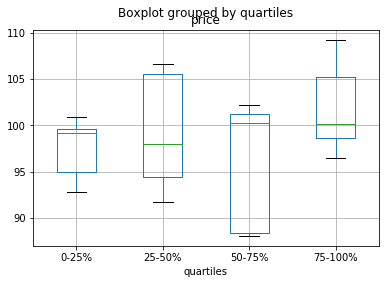

In [384]:
%matplotlib inline
df.boxplot(column=u'price', by=u'quartiles')

# Data In/Out

# CSV

In [386]:
# lendo multiplos arquivos para criarmos um simples DataFrame
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv('file_{}.csv'.format(i))

In [389]:
files = ['file_0.csv', 'file_1.csv', 'file_2.csv']

In [391]:
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

In [392]:
result

,Unnamed: 0,0,1,2,3
0,0,0.389304,-0.659987,0.285057,-0.343081
1,1,1.532467,-1.616560,-0.229527,0.687142
2,2,1.029509,-0.690270,0.342350,0.494063
3,3,0.157437,0.839933,-0.129627,1.204771
4,4,0.732020,-0.421868,-0.514258,-0.940982
5,5,0.393601,-0.364498,-1.933204,1.198047
6,6,-0.310656,0.134649,1.239214,-0.489845
7,7,-1.510619,-1.353662,1.012953,1.531204
8,8,-0.457099,0.445436,0.854321,0.955711
9,9,0.552070,1.795698,0.962984,-0.423824


In [393]:
# Dá para otimizar o uso de leitura de multimplos arquivos com o glob
import glob

In [394]:
files = glob.glob('file_*.csv')

In [395]:
files

['file_0.csv', 'file_1.csv', 'file_2.csv']

In [396]:
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
result

,Unnamed: 0,0,1,2,3
0,0,0.389304,-0.659987,0.285057,-0.343081
1,1,1.532467,-1.616560,-0.229527,0.687142
2,2,1.029509,-0.690270,0.342350,0.494063
3,3,0.157437,0.839933,-0.129627,1.204771
4,4,0.732020,-0.421868,-0.514258,-0.940982
5,5,0.393601,-0.364498,-1.933204,1.198047
6,6,-0.310656,0.134649,1.239214,-0.489845
7,7,-1.510619,-1.353662,1.012953,1.531204
8,8,-0.457099,0.445436,0.854321,0.955711
9,9,0.552070,1.795698,0.962984,-0.423824


In [399]:
# componentes de datas em várias colunas
i = pd.date_range('20000101', periods=10000)
i

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2027-05-09', '2027-05-10', '2027-05-11', '2027-05-12',
               '2027-05-13', '2027-05-14', '2027-05-15', '2027-05-16',
               '2027-05-17', '2027-05-18'],
              dtype='datetime64[ns]', length=10000, freq='D')

In [403]:
df = pd.DataFrame(dict(year = i.year, month = i.month, day = i.day))
df.head()

,day,month,year
0,1,1,2000
1,2,1,2000
2,3,1,2000
3,4,1,2000
4,5,1,2000


In [405]:
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')

7.82 ms ± 356 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [406]:
# Simular combiando uma string
ds = df.apply(lambda x: "%04d%02d%02d" % (x.year, x.month, x.day), axis=1)
ds.head()


0    20000101
1    20000102
2    20000103
3    20000104
4    20000105
dtype: object

In [407]:
%timeit pd.to_datetime(ds)

4.98 ms ± 2.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [408]:
# Skip row between header and data
data = """;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m2;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

In [409]:
data

';;;;\n;;;;\n;;;;\n;;;;\n;;;;\n;;;;\n;;;;\n;;;;\n;;;;\n;;;;\ndate;Param1;Param2;Param4;Param5\n    ;m2;°C;m²;m\n;;;;\n01.01.1990 00:00;1;1;2;3\n01.01.1990 01:00;5;3;4;5\n01.01.1990 02:00;9;5;6;7\n01.01.1990 03:00;13;7;8;9\n01.01.1990 04:00;17;9;10;11\n01.01.1990 05:00;21;11;12;13\n'

In [415]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [416]:
pd.read_csv(StringIO(data), sep=';', skiprows=[11, 12], index_col=0, parse_dates=True, header=10)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


In [417]:
# read column names and then data
pd.read_csv(StringIO(data), sep=';', header=10, nrows=10).columns

Index(['date', 'Param1', 'Param2', 'Param4', 'Param5'], dtype='object')

In [418]:
columns = pd.read_csv(StringIO(data), sep=';', header=10, nrows=10).columns

In [419]:
pd.read_csv(StringIO(data), sep=';', index_col=0, header=12, parse_dates=True, names=columns)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


# Timedeltas

In [420]:
s = pd.Series(pd.date_range('2012-1-1', periods=3, freq='D'))

In [421]:
s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [426]:
from datetime import datetime, timedelta

In [425]:
s - datetime(2011, 1, 1, 3, 5)

0   364 days 20:55:00
1   365 days 20:55:00
2   366 days 20:55:00
dtype: timedelta64[ns]

In [427]:
s + timedelta(minutes=5)

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [428]:
datetime(2011, 1, 1, 3, 5) - s

0   -365 days +03:05:00
1   -366 days +03:05:00
2   -367 days +03:05:00
dtype: timedelta64[ns]

In [430]:
timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [432]:
deltas = pd.Series([timedelta(days=i) for i in range(3)])

In [433]:
df = pd.DataFrame(dict(A = s, B = deltas)); df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [436]:
# Operação do datas
df['New Dates'] = df['A'] + df['B']; df

,A,B,New Dates
0,2012-01-01,0 days,2012-01-01
1,2012-01-02,1 days,2012-01-03
2,2012-01-03,2 days,2012-01-05


In [437]:
df['Delta'] = df['A'] - df['New Dates']; df

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


In [438]:
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object